In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

In [16]:
df_d = pd.read_pickle('Deals.pkl')
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21552 entries, 0 to 21593
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21552 non-null  object        
 1   Deal Owner Name      21523 non-null  object        
 2   Closing Date         14629 non-null  datetime64[ns]
 3   Quality              19308 non-null  object        
 4   Stage                21551 non-null  object        
 5   Lost Reason          16097 non-null  object        
 6   Page                 21551 non-null  object        
 7   Campaign             21552 non-null  object        
 8   SLA                  15515 non-null  object        
 9   Content              14122 non-null  object        
 10  Term                 12442 non-null  object        
 11  Source               21551 non-null  object        
 12  Payment Type         492 non-null    object        
 13  Product              3589 non-null  

In [ ]:
# 2. Filter df_d for Stage = 'Payment Done' and Months of study > 0
df_d_filtered = df_d[(df_d['Stage'] == 'Payment Done') & (df_d['Months of study'] > 0)]

# Count the number of rows after filtering
num_filtered_rows = df_d_filtered.shape[0]

# Output the number of rows
print(f"Number of rows where Stage = 'Payment Done' and Months of study > 0: {num_filtered_rows}")

# 3. Create a column 'Sum_Paid' based on the formula
df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']

# Calculate the sum for the new column Sum_Paid
total_sum_paid = df_d_filtered['Sum_Paid'].sum()

# Output the sum for Sum_Paid
print(f"Sum of 'Sum_Paid' column in the filtered df_d table: {total_sum_paid}")

# Calculate the sum for the 'Course duration' column
total_course_duration = df_d_filtered['Course duration'].sum()

# Calculate the sum for the 'Months of study' column
total_months_of_study = df_d_filtered['Months of study'].sum()

# Calculate the sum for the 'Offer Total Amount' column
total_offer_total_amount = df_d_filtered['Offer Total Amount'].sum()

# Output results
print(f"Sum of 'Course duration': {total_course_duration}")
print(f"Sum of 'Months of study': {total_months_of_study}")
print(f"Sum of 'Offer Total Amount': {total_offer_total_amount}")

Количество строк, где Stage = 'Payment Done' и Months of study > 0: 838
Сумма по столбцу 'Sum_Paid' в отфильтрованной таблице df_d: 3340287.878787879
Сумма по 'Course duration': 8533.0
Сумма по 'Months of study': 4561.0
Сумма по 'Offer Total Amount': 6323300.0


/var/folders/3f/yr1j00f96tn08rvm88vpmbsw0000gn/T/ipykernel_48097/24804119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']


In [ ]:
# Analyze the distribution of payment types
payment_distribution = df_d['Payment Type'].value_counts()

print("Distribution of Payment Types:")
print(payment_distribution)

Распределение типов оплаты:
Payment Type
Recurring Payments    349
One Payment           138
Reservation             5
Name: count, dtype: int64


In [ ]:
# Successful deals - at the 'Payment Done' stage
successful_payments = df_d[df_d['Stage'] == 'Payment Done']['Payment Type'].value_counts()

print("\nSuccessful Payment Types:")
print(successful_payments)


Успешные типы оплаты:
Payment Type
Recurring Payments    249
One Payment           110
Reservation             1
Name: count, dtype: int64


In [ ]:
# Lost deals - at the 'Lost' stage
lost_payments = df_d[df_d['Stage'] == 'Lost']['Payment Type'].value_counts()

print("\nLost Payment Types:")
print(lost_payments)


Потерянные типы оплаты:
Payment Type
Recurring Payments    87
One Payment           21
Reservation            4
Name: count, dtype: int64


In [ ]:
# Popularity of products
product_distribution = df_d['Product'].value_counts()

print("\nPopular Products:")
print(product_distribution)


Популярные продукты:
Product
Digital Marketing      1989
UX/UI Design           1021
Web Developer           575
Find yourself in IT       3
Data Analytics            1
Name: count, dtype: int64


In [ ]:
# Success of products
successful_products = df_d[df_d['Stage'] == 'Payment Done']['Product'].value_counts()

print("\nSuccessful Products:")
print(successful_products)


Успешные продукты:
Product
Digital Marketing    473
UX/UI Design         228
Web Developer        137
Name: count, dtype: int64


In [ ]:
# Popularity of education types
education_distribution = df_d['Education Type'].value_counts()

print("\nPopular Education Types:")
print(education_distribution)


Популярные типы обучения:
Education Type
Morning    2894
Evening     403
Name: count, dtype: int64


In [ ]:
# Success of education types
successful_education = df_d[df_d['Stage'] == 'Payment Done']['Education Type'].value_counts()

print("\nSuccessful Education Types:")
print(successful_education)


Успешные типы обучения:
Education Type
Morning    661
Evening    170
Name: count, dtype: int64


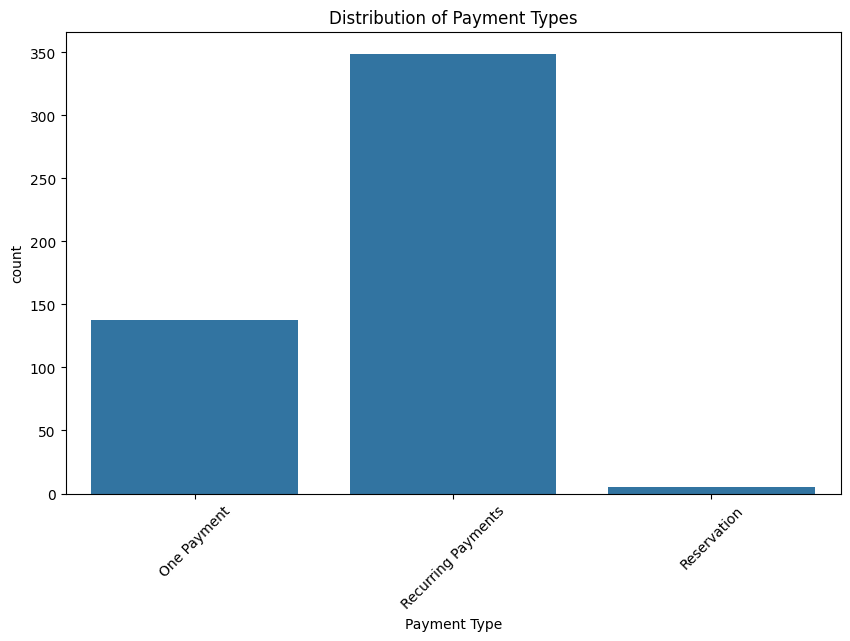

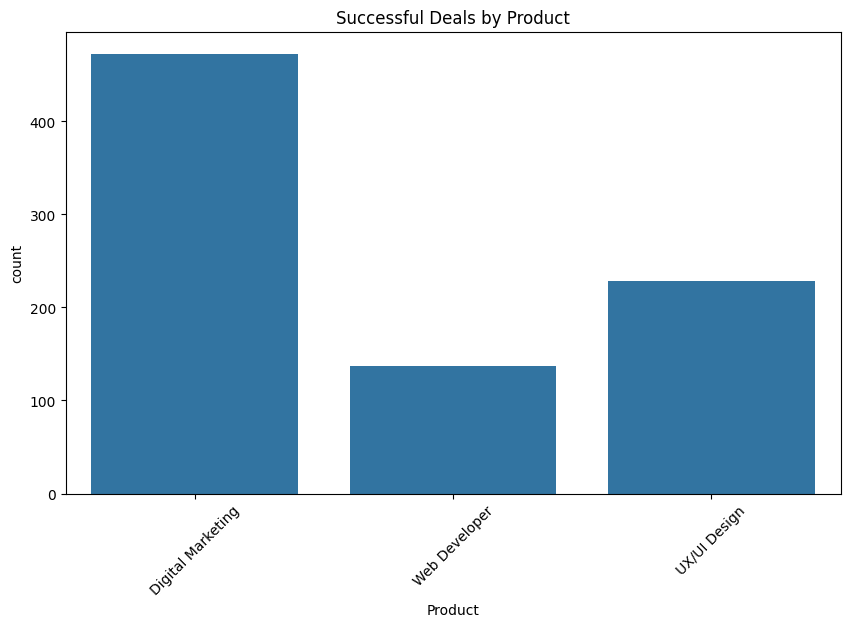

In [ ]:
# Visualization of payment type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_d, x='Payment Type')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.show()

# Visualization of successful deals by product
plt.figure(figsize=(10, 6))
sns.countplot(data=df_d[df_d['Stage'] == 'Payment Done'], x='Product')
plt.title('Successful Deals by Product')
plt.xticks(rotation=45)
plt.show()

## Conclusions
Products: The leading product is Digital Marketing, both in terms of the number of offers and the success of deals.
It is unusual that analytics are completely absent from the data, which may indicate a problem in data collection or categorization. This needs to be checked. Additional research should be conducted to understand whether there is a bias in sales or if this is related to the effective performance of managers promoting this product.

Payment Types: The primary payment type is Recurring Payments, which were used in 350 successful deals, representing a significant share.
This indicates that clients prefer to pay in installments rather than in one lump sum. Therefore, managers should emphasize the convenience of installment plans when closing deals.
One Payment was applied in 141 successful deals but clearly lags behind installments. To increase sales, more convenient payment options could be offered.

Education Types: The most successful training formats are Morning and Evening classes. Morning courses are significantly more popular than evening ones.
This reflects client preferences and possibly their flexible schedules. When planning new courses, more attention should be given to morning offerings.

Payments in Lost Deals: The majority of lost deals are associated with installments (87 cases), which may suggest that clients who prefer installments are more likely to back out at the deal stage.
This indicates a need for a more tailored approach to working with clients who choose installment plans, such as introducing additional incentives to close the deal.

Thus, the company should focus on:

Promoting and simplifying installments as the primary payment method.
Checking product data to eliminate possible errors.
Considering new strategies for working with clients who choose installments to minimize losses at the deal stage.